## 并行中介：自变量更多通过中介1，中介2，...中介n 影响因变量

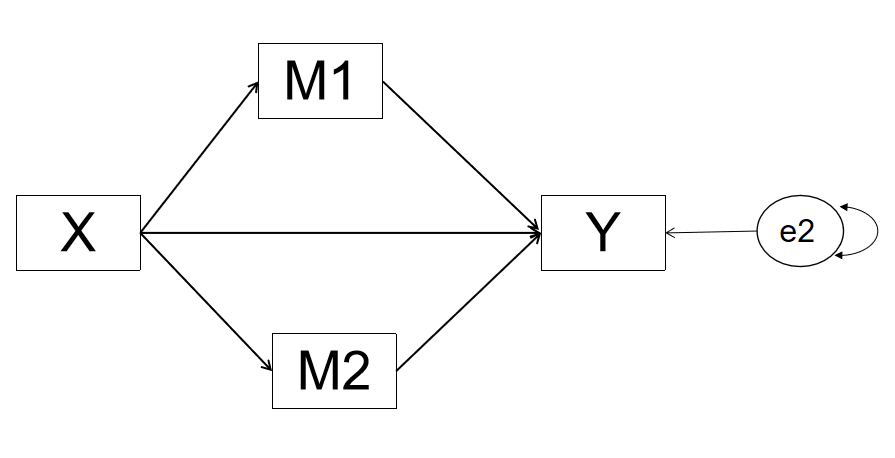

#### 在lavaan中定义模型

In [1]:
# 读入数据
BASE <- read.csv(file = "C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/data/data_multi_med.csv")
head(BASE)

,X,Y,M1,M2
,<dbl>,<dbl>,<dbl>,<dbl>
1,2.07109893,-1.8858031,1.42417506,-1.0522225
2,-0.03653262,-1.0574556,0.05043805,-0.9092617
3,-0.28612458,-0.1157801,1.49544778,-0.4278251
4,1.10072053,-1.4153384,-0.73636281,-0.5637711
5,-1.03054379,1.5330994,-1.34634870,0.1974450
6,0.36226927,-2.3753739,0.71443124,-0.8530618


In [2]:
# 载入lavaan
library("lavaan")

Warning message:
"程辑包'lavaan'是用R版本4.2.3 来建造的"
This is lavaan 0.6-16
lavaan is FREE software! Please report any bugs.



In [3]:
# 在 lavaan 中定义模型
MOD <- "
   Y ~ b1 * M1 + b2 * M2 + c * X
   M1 ~ a1 * X
   M2 ~ a2 * X

   #定义M1的中介效应
   indirect1 := a1 * b1

   #定义M2的中介效应
   indirect2 := a2 * b2

   #定义总效应
   total := c + (a1 * b1) + (a2 * b2)
   M1 ~~ M2

"

In [4]:
# 拟合模型
MOD_fit <- sem(MOD,BASE)

In [5]:
# 提取统计模型
summary(MOD_fit,
         fit.measures = TRUE, 
         standardized = TRUE,
         modindices = TRUE, 
         rsq = TRUE)

lhs,op,rhs,label,exo,est,se,z,pvalue,std.lv,std.all,std.nox
<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Y,~,M1,b1,0,-0.467246011,0.06664450,-7.01102123,2.365885e-12,-0.467246011,-0.401801531,-0.401801531
Y,~,M2,b2,0,0.701246063,0.07232616,9.69560793,0.000000e+00,0.701246063,0.504115800,0.504115800
Y,~,X,c,0,-0.006302124,0.08397043,-0.07505171,9.401736e-01,-0.006302124,-0.004353738,-0.004535038
M1,~,X,a1,0,0.591045657,0.07746381,7.62995897,2.353673e-14,0.591045657,0.474821524,0.494594173
M2,~,X,a2,0,-0.252729501,0.07137856,-3.54069228,3.990787e-04,-0.252729501,-0.242868628,-0.252982231
M1,~~,M2,,0,-0.088405794,0.07233893,-1.22210541,2.216678e-01,-0.088405794,-0.086740385,-0.086740385
Y,~~,Y,,0,0.975144894,0.09751449,10.00000000,0.000000e+00,0.975144894,0.504960086,0.504960086
M1,~~,M1,,0,1.106089973,0.11060900,10.00000000,0.000000e+00,1.106089973,0.774544520,0.774544520
M2,~~,M2,,0,0.939135621,0.09391356,10.00000000,0.000000e+00,0.939135621,0.941014829,0.941014829


### 实际例子

本例来自：方杰, 温忠麟, 张敏强, & 孙配贞. (2014). 基于结构方程模型的多重中介效应分析. 心理科学, 37(3), 735-741.

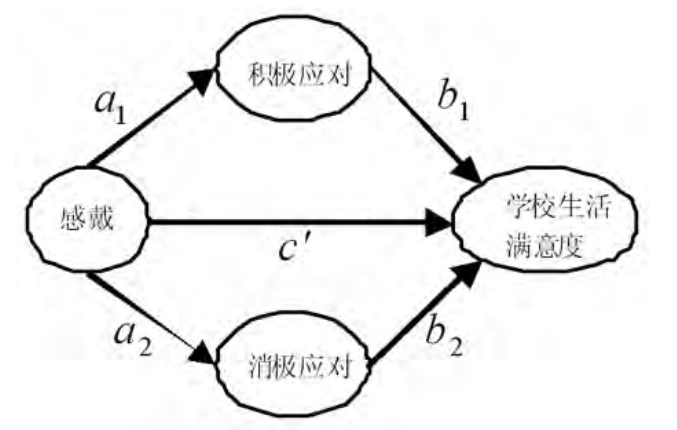

学生感戴状况如何影响生活满意度？ 更多通过改变消极应对方式起作用，还是更多通过改变积极应对方式起作用？

In [6]:
# 读入数据
BASE <- read.csv(file = "C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/data/data_multi_med_practice.csv")
head(BASE)

,X,感戴,学校满意度,积极应对,消极应对
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,9.142198,4.25231775,1.42417506,-2.7065988
2,2,4.926935,0.75207802,0.05043805,-1.6658488
3,3,4.427751,2.62091554,1.49544778,-0.8473011
4,4,7.201441,1.21458621,-0.73636281,-0.8378726
5,5,2.938912,0.09542798,-1.34634870,-0.5540209
6,6,5.724539,1.37399521,0.71443124,-0.5478757


In [7]:
# 定义模型
MOD <- "
   积极应对 ~ a1*感戴 
   消极应对 ~ a2*感戴
   学校满意度 ~ c*感戴 + b1*积极应对 + b2*消极应对
   
   积极应对 ~~ 消极应对
 
   ind1 := a1*b1
   ind2 := a2*b2
   total_ind := a1*b1 + a2*b2
   ind_diff := a1*b1 - a2*b2
"

In [8]:
# 拟合模型
MOD_fit <- sem(MOD,data = BASE)

In [9]:
# 提取统计结果
summary(MOD_fit,
         standardized = TRUE)

lhs,op,rhs,label,exo,est,se,z,pvalue,std.lv,std.all,std.nox
<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
积极应对,~,感戴,a1,0,0.29552283,0.03873190,7.6299589,2.353673e-14,0.29552283,0.47482152,0.24729709
消极应对,~,感戴,a2,0,-0.40880214,0.03823455,-10.6919559,0.000000e+00,-0.40880214,-0.60307675,-0.31409512
学校满意度,~,感戴,c,0,0.19304410,0.09785491,1.9727585,4.852308e-02,0.19304410,0.14350286,0.07473932
学校满意度,~,积极应对,b1,0,0.89397110,0.12977383,6.8886855,5.631051e-12,0.89397110,0.41360726,0.41360726
学校满意度,~,消极应对,b2,0,-0.57255456,0.13146192,-4.3552884,1.328918e-05,-0.57255456,-0.28851041,-0.28851041
积极应对,~~,消极应对,,0,0.04569693,0.07727564,0.5913497,5.542862e-01,0.04569693,0.04185134,0.04185134
积极应对,~~,积极应对,,0,1.10608998,0.11060900,10.0000000,0.000000e+00,1.10608998,0.77454452,0.77454452
消极应对,~~,消极应对,,0,1.07786605,0.10778660,10.0000000,0.000000e+00,1.07786605,0.63629843,0.63629843
学校满意度,~~,学校满意度,,0,3.71906147,0.37190615,10.0000000,0.000000e+00,3.71906147,0.55746632,0.55746632


## 路径模型的链式中介（series mediation）：自变量通过影响中介1，进而影响中介2....中介n，进而影响到因变量？

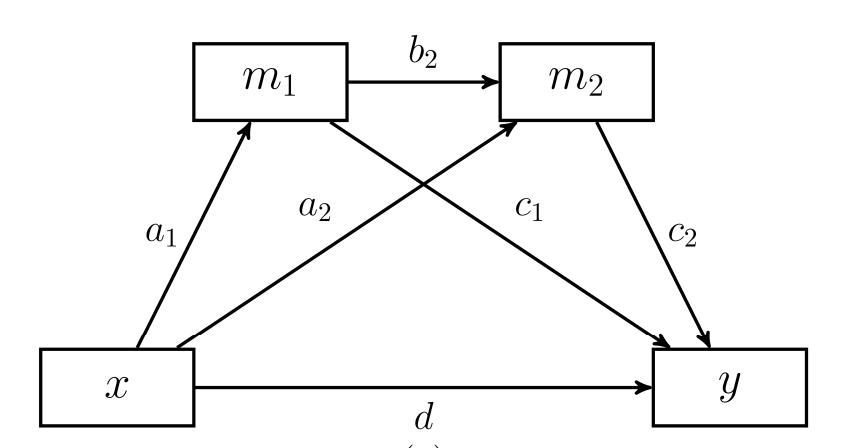

以上链式中介模型包含：

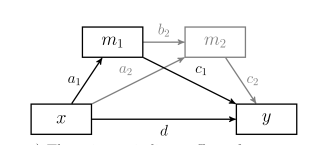

m1 为中介因子的主要间接效应 a1*c1

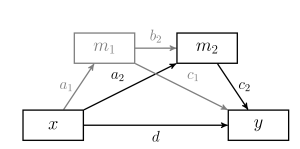

m2 为中介因子的主要间接效应 a2*c2

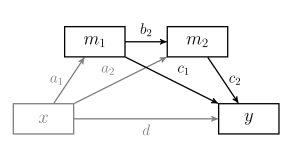

m2 为中介因子的次要间接效应 b2*c2

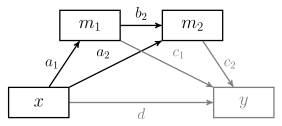

m1 为中介因子的次要间接效应 a1*b2

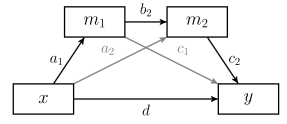

m1 和 m2 共同主导的链式中介效应 a1*b2*c2

#### 在lavaan中定义模型

In [16]:
# 载入lavaan
library(lavaan)

In [17]:
# 导入数据
BASE <- read.csv("C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/data/data_seris_med.csv")

In [12]:
head(BASE)

,X,Y,M1,M2
,<dbl>,<dbl>,<dbl>,<dbl>
1,9.142198,7.420741,4.9597245,4.360349
2,4.926935,3.169498,2.5321717,1.562031
3,4.427751,6.231325,3.8523855,2.177460
4,7.201441,4.825934,2.3139975,3.036185
5,2.938912,2.765193,0.6383794,1.056888
6,5.724539,4.644288,3.3955659,2.295991


In [13]:
# 定义模型
MOD <- "
        M1 ~ a1 * X
        M2 ~ a2 * X + b2 * M1
        Y ~  d * X + c1 * M1 + c2 * M2
        pri_indeff_m1 := a1*c1
        pri_indeff_m2 := a2*c2
        sec_indeff_m1 := a1*b2
        sec_indeff_m2 := b2*c2
        ind_eff := a1 * b2 * c2
"

In [14]:
# 模型拟合
MOD_fit <- sem(
    model = MOD,
    data  = BASE,
    se = "bootstrap",
    bootstrap = 500
)

In [15]:
# 提取统计结果
summary(MOD_fit,
         fit.measures = TRUE, 
         standardized = TRUE,
         modindices = TRUE, 
         rsq = TRUE)

lhs,op,rhs,label,exo,est,se,z,pvalue,std.lv,std.all,std.nox
<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M1,~,X,a1,0,0.54552283,0.03634070,15.011345,0.000000e+00,0.54552283,0.70566365,0.36752454
M2,~,X,a2,0,0.44223689,0.05281700,8.373003,0.000000e+00,0.44223689,0.57892548,0.30151663
M2,~,M1,b2,0,0.22007366,0.06539690,3.365200,7.648817e-04,0.22007366,0.22271575,0.22271575
Y,~,X,d,0,0.13529176,0.08453637,1.600397,1.095105e-01,0.13529176,0.11200071,0.05833234
Y,~,M1,c1,0,0.76545095,0.10652448,7.185681,6.687984e-13,0.76545095,0.48987128,0.48987128
Y,~,M2,c2,0,0.42782372,0.10509799,4.070713,4.686951e-05,0.42782372,0.27054942,0.27054942
M1,~~,M1,,0,1.10608998,0.10334102,10.703301,0.000000e+00,1.10608998,0.50203881,0.50203881
M2,~~,M2,,0,0.93206967,0.09233109,10.094863,0.000000e+00,0.93206967,0.43327234,0.43327234
Y,~~,Y,,0,2.07058642,0.20389919,10.154952,0.000000e+00,2.07058642,0.38491907,0.38491907


### 实际例子

来源：葛枭语, & 侯玉波 (2021)

君子人格 使人有更好的自我控制，进而表达出真实性， 进而有利心理健康

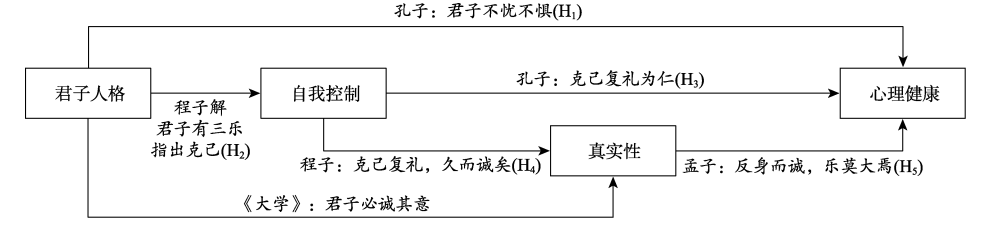

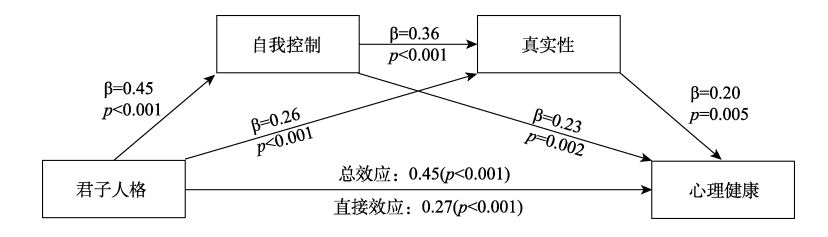

In [18]:
# 载入 lavaan
library(lavaan)

In [19]:
#读入数据
BASE <- read.csv("C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/data/data_seris_med_practice.csv")

In [20]:
head(BASE)

,君子人格,心理健康,自我控制,真实性
,<dbl>,<dbl>,<dbl>,<dbl>
1,9.142198,2.8321503,0.9577802,2.6995814
2,4.926935,0.7343054,1.8752069,2.2190930
3,4.427751,2.5421232,2.8291861,1.1798535
4,7.201441,2.4900623,1.7080718,1.9867664
5,2.938912,0.4127540,0.9329004,-0.1635489
6,5.724539,1.0128615,3.0254066,3.8361337


In [21]:
#在lavaan中定义模型
MOD <- "
        自我控制 ~ a1 * 君子人格
        真实性 ~ a2 * 自我控制 + b2 * 君子人格
        心理健康 ~  d * 君子人格 + c1 * 自我控制 + c2 * 真实性
        pri_indeff_自我控制 := a1*c1
        pri_indeff_真实性 := a2*c2
        sec_indeff_自我控制 := a1*b2
        sec_indeff_真实性 := b2*c2
        ind_eff := a1 * b2 * c2
"

In [22]:
# 模型拟合
MOD_fit <- sem(
   model = MOD,
   data  = BASE,
   se = "bootstrap",
   bootstrap = 500
)


In [23]:
# 提取统计结果
summary(MOD_fit,
         fit.measures = TRUE, 
         standardized = TRUE,
         modindices = TRUE, 
         rsq = TRUE)

lhs,op,rhs,label,exo,est,se,z,pvalue,std.lv,std.all,std.nox
<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
自我控制,~,君子人格,a1,0,0.453734803,0.030225614,15.011599,0.000000e+00,0.453734803,0.65957664,0.32848620
真实性,~,自我控制,a2,0,0.411548891,0.054975403,7.486055,7.105427e-14,0.411548891,0.41178901,0.41178901
真实性,~,君子人格,b2,0,0.224743670,0.037673692,5.965533,2.438361e-09,0.224743670,0.32689174,0.16280053
心理健康,~,君子人格,d,0,0.294935775,0.055908985,5.275284,1.325506e-07,0.294935775,0.34676388,0.17269737
心理健康,~,自我控制,c1,0,0.271890826,0.089975708,3.021825,2.512559e-03,0.271890826,0.21990636,0.21990636
心理健康,~,真实性,c2,0,0.080009208,0.075205723,1.063871,2.873870e-01,0.080009208,0.06467402,0.06467402
自我控制,~~,自我控制,,0,1.077920157,0.094216447,11.440892,0.000000e+00,1.077920157,0.56495866,0.56495866
真实性,~~,真实性,,0,1.040532858,0.077296250,13.461621,0.000000e+00,1.040532858,0.54599982,0.54599982
心理健康,~~,心理健康,,0,1.988946856,0.176675780,11.257609,0.000000e+00,1.988946856,0.68192987,0.68192987


#### 参考文献：

方杰, 温忠麟, 张敏强, & 孙配贞. (2014). 基于结构方程模型的多重中介效应分析. 心理科学, 37(3), 735-741.


葛枭语, & 侯玉波. (2021). 君子不忧不惧: 君子人格与心理健康——自我控制与真实性的链式中介. 心理学报, 53(4), 374.